In [1]:
!pip install pandas kmodes openpyxl


                                              0.0/10.7 MB ? eta -:--:--
                                              0.2/10.7 MB 5.8 MB/s eta 0:00:02
     -                                        0.5/10.7 MB 5.4 MB/s eta 0:00:02
     ---                                      0.9/10.7 MB 6.4 MB/s eta 0:00:02
     -----                                    1.6/10.7 MB 8.3 MB/s eta 0:00:02
     --------                                 2.2/10.7 MB 10.0 MB/s eta 0:00:01
     ------------                             3.2/10.7 MB 12.0 MB/s eta 0:00:01
     -------------                            3.7/10.7 MB 11.8 MB/s eta 0:00:01
     ----------------                         4.5/10.7 MB 12.5 MB/s eta 0:00:01
     -------------------                      5.3/10.7 MB 13.6 MB/s eta 0:00:01
     ----------------------                   6.1/10.7 MB 13.4 MB/s eta 0:00:01
     -------------------------                6.9/10.7 MB 14.1 MB/s eta 0:00:01
     ------------------------------           8.1/10


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from kmodes.kmodes import KModes

In [5]:
df = pd.read_excel(r'C:/Users/tejwa/Desktop/Uni_Applications/UW MISM/Job/Interview_prac/WBD/df_selected.xlsx')

In [4]:
# Convert the columns to categorical if necessary
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

# Check the data types
print(df.dtypes)

promotions                           int64
gender_key                        category
ethnicity                         category
marital_status                    category
manager_gender_key                category
manager_role                          bool
business_resource_group_member        bool
department_name                   category
city_name                         category
top_talent                            bool
tenure_band                       category
manager_age_band                  category
distance_band                     category
age_band                          category
dtype: object


In [5]:
# Convert promotions column to category
df['promotions'] = df['promotions'].astype('category')

# Check if the change was successful
print(df.dtypes)


promotions                        category
gender_key                        category
ethnicity                         category
marital_status                    category
manager_gender_key                category
manager_role                          bool
business_resource_group_member        bool
department_name                   category
city_name                         category
top_talent                            bool
tenure_band                       category
manager_age_band                  category
distance_band                     category
age_band                          category
dtype: object


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2253, cost: 56872.0
Run 1, iteration: 2/100, moves: 399, cost: 56872.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1990, cost: 56336.0
Run 2, iteration: 2/100, moves: 333, cost: 56336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1933, cost: 55087.0
Run 3, iteration: 2/100, moves: 248, cost: 55087.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1026, cost: 55197.0
Run 4, iteration: 2/100, moves: 285, cost: 55197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1724, cost: 56201.0
Run 5, iteration: 2/100, moves: 169, cost: 56201.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starti

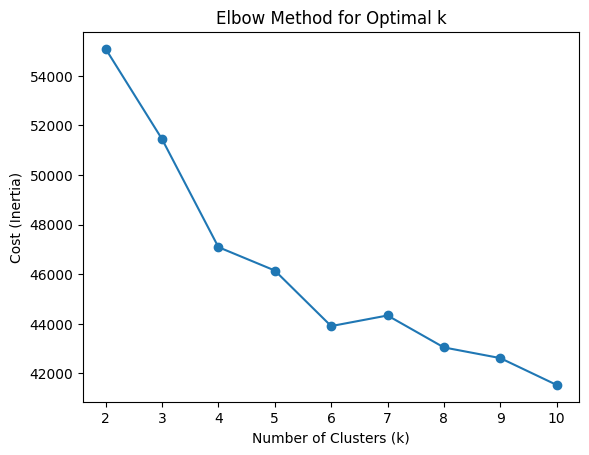

In [66]:
# Initializing a list to store cost (inertia) for each value of k
costs = []

# Running K-modes for k from 2 to 10
for k in range(2, 11):
    kmode = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    kmode.fit(df)
    costs.append(kmode.cost_)

# Plotting the costs to visualize the Elbow method
import matplotlib.pyplot as plt

plt.plot(range(2, 11), costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
# Ensure all categorical columns are factors (except for numerical ones)
df = df.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

# Check the column types again
print(df.dtypes)


promotions                        category
gender_key                        category
ethnicity                         category
marital_status                    category
manager_gender_key                category
manager_role                          bool
business_resource_group_member        bool
department_name                   category
city_name                         category
top_talent                            bool
tenure_band                       category
manager_age_band                  category
distance_band                     category
age_band                          category
dtype: object


In [14]:
# Convert the 'promotions' column to category type
df['promotions'] = df['promotions'].astype('category')

# Check the column types again
print(df.dtypes)


promotions                        category
gender_key                        category
ethnicity                         category
marital_status                    category
manager_gender_key                category
manager_role                          bool
business_resource_group_member        bool
department_name                   category
city_name                         category
top_talent                            bool
tenure_band                       category
manager_age_band                  category
distance_band                     category
age_band                          category
dtype: object


In [43]:
# Import necessary libraries
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

# Initialize the K-Modes model with k = 4 (you can change k based on the analysis)
kmodes = KModes(n_clusters=7, init='Cao', n_init=10, verbose=1)

# Fit the model
kmodes.fit(df)

# Get the cluster labels
labels = kmodes.labels_

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1902, cost: 44060.0
Run 1, iteration: 2/100, moves: 1705, cost: 42816.0
Run 1, iteration: 3/100, moves: 567, cost: 42816.0


In [8]:
from kmodes.kmodes import KModes

# Perform K-Modes clustering with k=4 (optimal from Elbow Method)
k_modes = KModes(n_clusters=7, init='Huang', n_init=5, verbose=1)
df['cluster'] = k_modes.fit_predict(df)

# Print cluster centers
print("Cluster Centers:")
print(k_modes.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2586, cost: 43154.0
Run 1, iteration: 2/100, moves: 393, cost: 43154.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1886, cost: 42575.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2769, cost: 41743.0
Run 3, iteration: 2/100, moves: 281, cost: 41743.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2914, cost: 41589.0
Run 4, iteration: 2/100, moves: 490, cost: 41455.0
Run 4, iteration: 3/100, moves: 114, cost: 41455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2719, cost: 41806.0
Run 5, iteration: 2/100, moves: 289, cost: 41806.0
Best run was number 4
Cluster Centers:
[['0' 'M' 'Black' 'Single' 'M' 'False' 'False'

   manager_role  business_resource_group_member  top_talent  cluster  \
0          True                            True       False        3   
1          True                            True        True        1   
2          True                            True       False        1   
3          True                            True        True        1   
4          True                            True        True        1   

   promotions_1  promotions_2  promotions_3  promotions_4  promotions_5  \
0         False         False         False         False         False   
1         False         False         False          True         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False          True         False         False   

   promotions_6  ...  manager_age_band_50-60  \
0          True  ...                   False   
1         False  ...

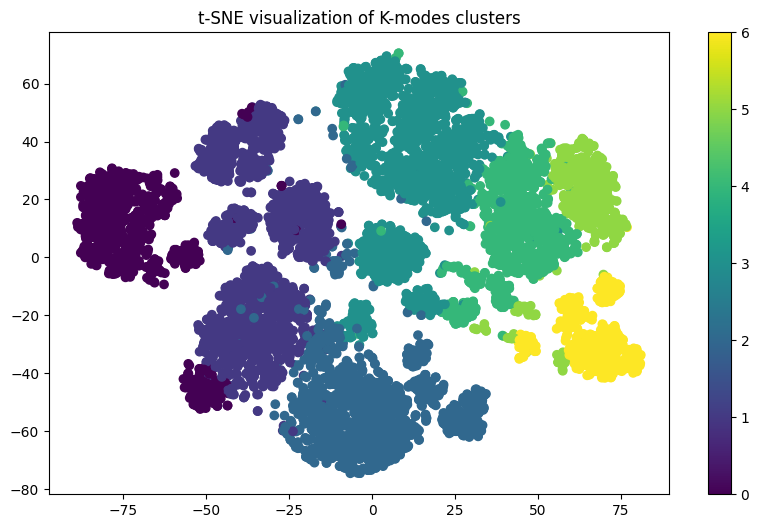

In [65]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True to avoid multicollinearity

# Check the new dataframe
print(df_encoded.head())

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to the one-hot encoded data
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(df_encoded)

# Plotting t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['cluster'], cmap='viridis')
plt.colorbar()
plt.title('t-SNE visualization of K-modes clusters')
plt.show()

In [11]:
# Ensure the cluster column exists
if 'cluster' in df.columns:
    # Loop over each cluster
    for i in range(7):  # For each cluster (adjust based on the number of clusters you choose)
        print(f"Cluster {i} distribution:")
        
        # For each cluster, calculate the mode of each column
        mode_df = df[df['cluster'] == i].mode(axis=0).iloc[0]
        print(mode_df)
        print("\n")  # Add a newline for better readability
else:
    print("Cluster column not found in the DataFrame.")


Cluster 0 distribution:
promotions                                                  0
gender_key                                                  M
ethnicity                                               Black
marital_status                                         Single
manager_gender_key                                          M
manager_role                                            False
business_resource_group_member                          False
department_name                               Human Resources
city_name                                           Streatham
top_talent                                              False
tenure_band                                           <1 year
manager_age_band                                        40-50
distance_band                          6-15 km (City commute)
age_band                          25-34: Building & Advancing
cluster                                                     0
Name: 0, dtype: object


Cluster 1 distributio

In [13]:
# Assuming 'df_selected' contains the features and the cluster labels are stored in the 'cluster' column

# Add a new column 'cluster_label' to the DataFrame, which indicates the cluster number
df['cluster_label'] = df['cluster']

# Now, let's export this DataFrame to an Excel file
import pandas as pd

# Define the path to save the Excel file
output_file = r"C:\Users\tejwa\Desktop\Uni_Applications\UW MISM\Job\Interview_prac\WBD\employee_clusters_with_labels.xlsx"

# Save the DataFrame with the cluster labels into an Excel file
df.to_excel(output_file, index=False)

# Return the path to the generated Excel file
output_file

'C:\\Users\\tejwa\\Desktop\\Uni_Applications\\UW MISM\\Job\\Interview_prac\\WBD\\employee_clusters_with_labels.xlsx'